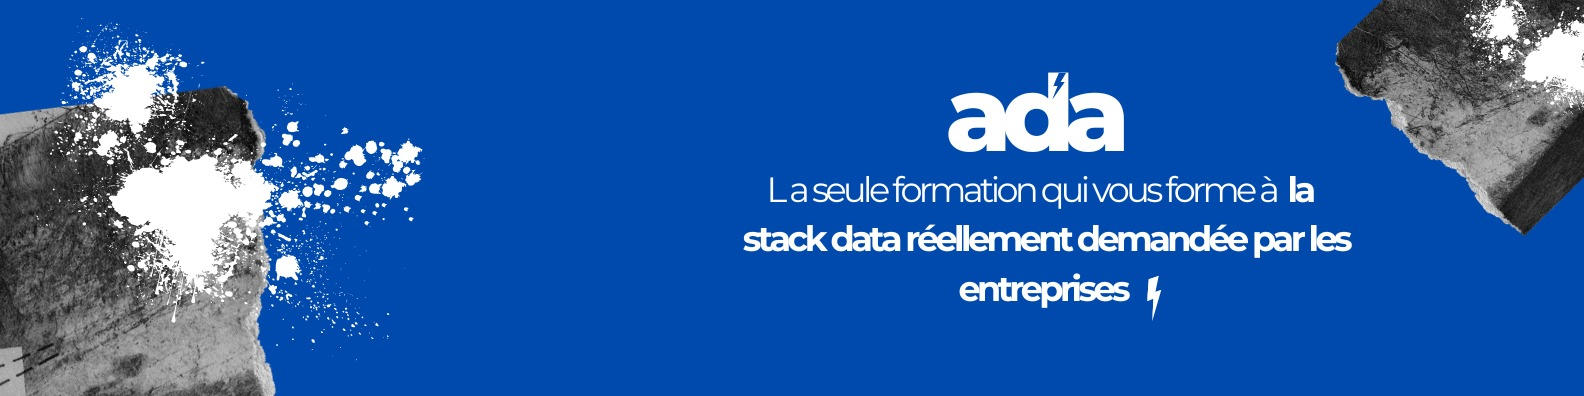

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Intéragir avec une API</h1></center>
<center><h2>Exercices sur l'utilisation de la librairie requests</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">


⚠️ Faire une copie du notebook avant de travailler dessus :)

# Poster des données vers une API

Dans notre travail, il nous est parfois demandé d'exporter des données vers une API. Pour cela, il nous faut utiliser la fonction `post` de la librairie `requests`.

Dans cette section, on va utiliser le site [restful-api](https://restful-api.dev/).

Pour rappel, pour envoyer des données en JSON vers une API, on peut utiliser le code suivant:

In [ ]:
import requests
url = ""
json_data = {}
r = requests.post(url, json=json_data)

Il est aussi toujours utile de vérifier le code status retourné par l'API avec:
```python
r.status_code
```

Les valeurs les plus importantes sont:
- entre 200 et 299 (inclus): alors tout va bien, l'API a accepté notre requête
- 400: La requête est mal formée
- 401 et 403: on a un problème d'autorisation
- 404: L'URL n'est pas correcte  
- 500, 502, 503: Une erreur s'est produite au niveau de l'API elle-même


Pour plus de détails sur tous les autres codes, vous pouvez vous référer à cet article [Wikipedia](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

## Exercice 1: Envoyer des données vers une API
Pour commencer, écrire un code qui sache envoyer ce JSON vers l'URL `https://api.restful-api.dev/objects`

```json
{
   "name": "Apple MacBook Pro 16",
   "data": {
      "year": 2019,
      "price": 1849.99,
      "CPU model": "Intel Core i9",
      "Hard disk size": "1 TB"
   }
}
```

Quelle est la réponse de l'API? Quel est le contenu des variables:
```
status_code
ok
reason
```
et de la fonction `json()`

PS: vous pouvez accéder à ces variable et cette fonction en utilisant la variable `r` définie dans l'exemple ci-dessus

⛔ Solution

In [ ]:
# @title
import requests
json_data = {
   "name": "Apple MacBook Pro 16",
   "data": {
      "year": 2019,
      "price": 1849.99,
      "CPU model": "Intel Core i9",
      "Hard disk size": "1 TB"
   }
}
url = "https://api.restful-api.dev/objects"
r = requests.post(url, json=json_data)

# Le statut code est 200, l'opération est un succès
r.status_code

# Il existe aussi un booléen qui vérifie pour nous si l'opération était un succès
r.ok

# La variable reason indique parfois "OK" ou un autre message de succès. Dans ce cas, elle est juste vide
r.reason

# La fonction `json` nous retourne la réponse de l'API, s'il y en a une
r.json()

## Exercice 2: Envoyer un JSON malformé?

Considérons cette valeur:
```
{"hello"}
```

Essayez de l'envoyer vers la même API ci-dessus. Que se passe-t-il?

⛔ Solution

In [ ]:
# @title
import requests
json_data = {"hello"}
url = "https://api.restful-api.dev/objects"
r = requests.post(url, json=json_data)

# On obtient une exception parce que l'argument `json` s'attend qu'on lui donne un
# JSON (ou dictionnaire) correctement formé

Pour envoyer un JSON malformé, il vaut mieux contourner l'argument `json`. Essayez maintenant ce code et vérifiez les valeurs des variables et fonction qu'on a vues plus haut

```
import requests
json_malforme = '{"hello"}'
url = "https://api.restful-api.dev/objects"
r = requests.post(url, data=json_malforme)
```

⛔ Solution

In [ ]:
# @title
import requests
json_malforme = '{"hello"}'
url = "https://api.restful-api.dev/objects"
r = requests.post(url, data=json_malforme)
print("status_code", r.status_code)
print("ok", r.ok)
print("reason", r.reason)

# Et si on retrouvait des données

Pour retrouver les données d'une API, on utilise la méthode `get`, exactement comme on le fait dans le cours.

L'API qu'on utilise ici, utilise la même URL pour recevoir et envoyer des données. La différence est la méthode `post` ou `get`

In [ ]:
import requests
url = "https://api.restful-api.dev/objects"

r = requests.get(url)
print("status_code", r.status_code)
r.json()

Pour retrouver des données spécifiques, on rajoute des "paramètres" à notre URL.

Par exemple, si on veut l'objet avec `id=3`, on appelle
`https://api.restful-api.dev/object?id=3`. Ainsi:

In [ ]:
import requests
r = requests.get("https://api.restful-api.dev/object?id=3")
print("status_code", r.status_code)
r.json()

Si on veut plusieurs éléments ou si on veut filtrer sur plusieurs champs, on utilise le caractère `&`. Par exemple:

```www.example.com?id=1&id=2```

pour obtenir les documents dont l'identifiant est 1 et 2

In [ ]:
import requests
r = requests.get("https://api.restful-api.dev/objects?id=3&id=4")
print("status_code", r.status_code)
r.json()